<a href="https://colab.research.google.com/github/youngchul-sung/start-tf2-programming/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [2]:
rand = tf.random.uniform([1], 0, 1)
print(rand)

tf.Tensor([0.5246705], shape=(1,), dtype=float32)


In [3]:
rand = tf.random.uniform([4], 0, 1)
print(rand)

tf.Tensor([0.97729325 0.6310221  0.36729372 0.5845314 ], shape=(4,), dtype=float32)


In [4]:
rand = tf.random.normal([4], 0, 1)
print(rand)

tf.Tensor([-0.3562709  -0.38770968 -1.3404684  -0.6781537 ], shape=(4,), dtype=float32)


3.3.2

In [0]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [6]:
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.6918082858645737


In [7]:
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w * 0.1 * error

    if i % 100 == 99:
        print(i, error, output)

99 -0.5 0.5
199 -0.5 0.5
299 -0.5 0.5
399 -0.5 0.5
499 -0.5 0.5
599 -0.5 0.5
699 -0.5 0.5
799 -0.5 0.5
899 -0.5 0.5
999 -0.5 0.5


In [8]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error

    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [9]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + x * 0.1 * error

    if i % 100 == 99:
        print(i, error, output)

99 0.5846059079209076 0.41539409207909234
199 0.5846059079209076 0.41539409207909234
299 0.5846059079209076 0.41539409207909234
399 0.5846059079209076 0.41539409207909234
499 0.5846059079209076 0.41539409207909234
599 0.5846059079209076 0.41539409207909234
699 0.5846059079209076 0.41539409207909234
799 0.5846059079209076 0.41539409207909234
899 0.5846059079209076 0.41539409207909234
999 0.5846059079209076 0.41539409207909234


In [10]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [11]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 100 == 99:
        print(i, error_sum)

99 -0.18150288132955228
199 -0.11481507121533281
299 -0.08479227284427426
399 -0.06726617629823008
499 -0.055693090769731994
599 -0.04746922330077518
699 -0.04132674074966826
799 -0.03656692880846267
899 -0.03277452301157054
999 -0.02968222900238835
1099 -0.027113621436427718
1199 -0.02494860296212154
1299 -0.023097915732537458
1399 -0.02150013630355249
1499 -0.020106740983997277
1599 -0.01888055960398339
1699 -0.017793215363525364
1799 -0.01682181841598725
1899 -0.015951993113020684
1999 -0.015164354654191504


In [12]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [13]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9645977383109953
X: [1 0] Y: [0] Output: 0.02508589297641967
X: [0 1] Y: [0] Output: 0.025163128134870684
X: [0 0] Y: [0] Output: 2.4376416800826185e-05


In [14]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 100 == 99:
        print(i, error_sum)

99 -0.10234044069063891
199 -0.052996304458448856
299 -0.03569122340696643
399 -0.026831736608703666
499 -0.021447011843785835
599 -0.017834386229358595
699 -0.015247209330007144
799 -0.013305616575226858
899 -0.011796439714985736
999 -0.010590620102442098
1099 -0.009605702544197084
1199 -0.008786216584360407
1299 -0.008094405445774513
1399 -0.007502355700170618
1499 -0.00699045265398493
1599 -0.00654283549714986
1699 -0.006148615211460144
1799 -0.005799389859854738
1899 -0.005486644055023658
1999 -0.00520547473175741


In [15]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971131081287
X: [1 0] Y: [1] Output: 0.989679881583758
X: [0 1] Y: [1] Output: 0.9896570054094685
X: [0 0] Y: [0] Output: 0.025806277217191708


In [16]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.0006280478510086729
399 -2.5528340210634326e-05
599 -1.041464892881372e-06
799 -4.653552321265408e-09
999 3.722842145670313e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [17]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


In [18]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


In [19]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 1s 134ms/sample - loss: 0.2794
Epoch 2/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2745
Epoch 3/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2708
Epoch 4/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2684
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2665
Epoch 6/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2661
Epoch 7/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2652
Epoch 8/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2647
Epoch 9/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2637
Epoch 10/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2642
Epoch 11/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2638
Epoch 12/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2626
Epoc

In [21]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.05498703],
       [0.95709157],
       [0.95668113],
       [0.03873194]], dtype=float32)

In [22]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-6.031323, -4.094418],
       [-5.850115, -4.064396]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([2.2694764, 6.018265 ], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-8.279811 ],
       [ 7.9969296]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-3.6849658], dtype=float32)>


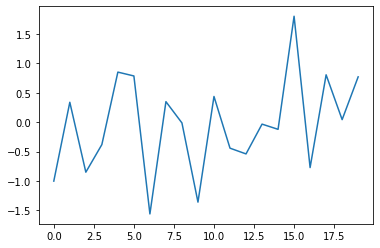

In [23]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

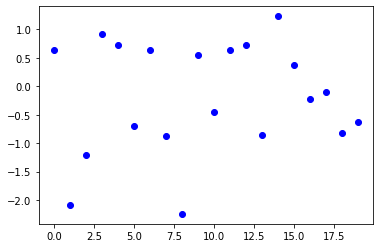

In [24]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

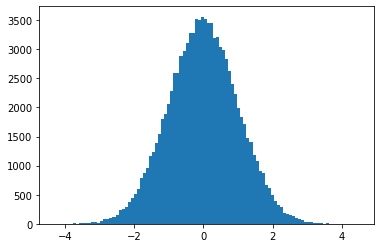

In [25]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

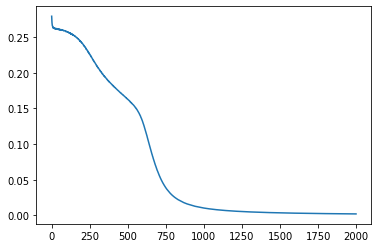

In [26]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])